In [1]:
import glob
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def get_algorithm(params_path):
    with open(params_path, "r") as f:
        params = []
        for i, l in enumerate(f.readlines()):
            params.append(l)
    # get params
    ssl = [j.split(" ")[1].strip("\n") for j in params if "ssl_task" in j][0]
    return ssl

SAVE_DIR = "/home/noah/ESSL/exps/Analysis/train_models_longer/plots/best_overall_acc"

In [3]:

exps = []
# b256 = glob.glob("/home/noah/ESSL/final_exps/optimization/exp8*/*")
# for b in b256:
#     exps.append([b, "cifar10", 256, get_algorithm(os.path.join(b, "params.txt"))])

# b256_svhn = glob.glob("/home/noah/ESSL/final_exps/optimization/exp10*/*")
# for b in b256_svhn:
#     exps.append([b, "svhn", 256, get_algorithm(os.path.join(b, "params.txt"))])

b32 = glob.glob("/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/*")
for b in b32:
    try:
        dset, bs, algo = os.path.basename(b).split("_")
    except:
        continue
    exps.append([b, dset, bs, algo])

for e in exps:
    print(e)
convert = {"990_50": "1000", "90_50":"100", "40_50":"50"}
results = []
for e, data, bsize, algo in exps:
    for f in glob.glob(os.path.join(e, "*_50/outcomes.json")):
        try:
            ssl_bs = convert[f.split("/")[-2]]
        except KeyError: 
            ssl_bs = f.split("/")[-2]
        with open(f, "r") as fp:
            outcomes = json.load(fp)
        best_acc_i = np.argmax(outcomes['test acc'])
        test_acc = outcomes['test acc'][best_acc_i]
        test_loss = outcomes['final test loss'][best_acc_i]
        results.append([data, bsize, algo, ssl_bs, test_acc, test_loss])
df = pd.DataFrame(results, columns = ["dataset", "BS", "algo", "SSL_epochs", "test_acc", "test_loss"])
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column] = df[column].astype('int32')
    if df[column].dtype == "float64":
        df[column] = df[column].astype('float32')
df['dataset'] = df['dataset'].apply(lambda x: x.lower())
df['SSL_epochs'] = df['SSL_epochs'].apply(lambda x: x.split("_")[0])
df.to_csv("/home/noah/ESSL/final_exps/final_results/train_models_longer.csv")
df

['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_32_SwaV', 'Cifar10', '32', 'SwaV']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/SVHN_256_NNCLR', 'SVHN', '256', 'NNCLR']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_32_NNCLR', 'Cifar10', '32', 'NNCLR']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/SVHN_256_BYOL', 'SVHN', '256', 'BYOL']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_256_NNCLR', 'Cifar10', '256', 'NNCLR']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/SVHN_32_NNCLR', 'SVHN', '32', 'NNCLR']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/SVHN_32_SwaV', 'SVHN', '32', 'SwaV']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_32_SimSiam', 'Cifar10', '32', 'SimSiam']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_256_SimSiam', 'Cifar10', '256',

,dataset,BS,algo,SSL_epochs,test_acc,test_loss
0,cifar10,32,SwaV,50,84.800003,0.445367
1,cifar10,32,SwaV,1000,78.400002,0.620051
2,cifar10,32,SwaV,100,84.739998,0.451477
3,svhn,256,NNCLR,1000,93.638596,0.222730
4,svhn,256,NNCLR,100,93.700058,0.222969
5,svhn,256,NNCLR,50,93.546402,0.232902
6,cifar10,32,NNCLR,50,85.040001,0.445859
7,cifar10,32,NNCLR,1000,84.879997,0.455933
8,cifar10,32,NNCLR,100,85.580002,0.429983
9,svhn,256,BYOL,1000,93.515671,0.234365


cifar10 256


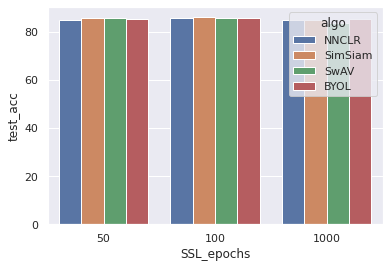

cifar10 32


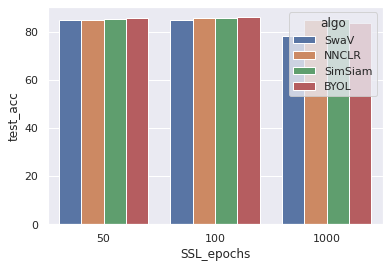

svhn 256


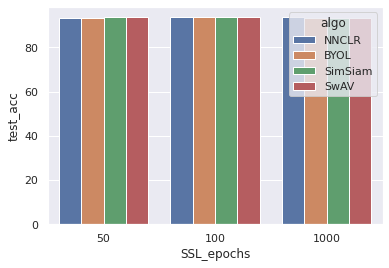

svhn 32


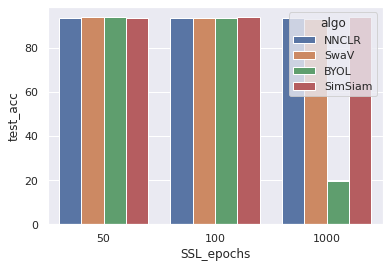

In [4]:
# comparison with boxplots
sns.set_theme()
for (ds, bs), df_i in df.groupby(['dataset', 'BS']):
    print(ds, bs)

    sns.barplot(data=df_i, x='SSL_epochs', y='test_acc', hue='algo', order=["50", "100", "1000"])
    plt.show()

Unnamed: 0          int64
exp                object
algo               object
test acc (so)     float64
test loss (so)    float64
test acc (mo)     float64
test loss (mo)    float64
batch size          int64
data set           object
dtype: object

cifar10 256


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


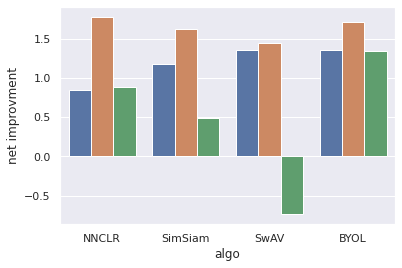

cifar10 32


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


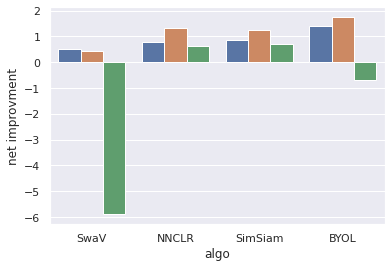

svhn 256


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


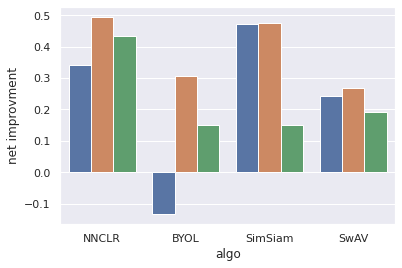

svhn 32


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


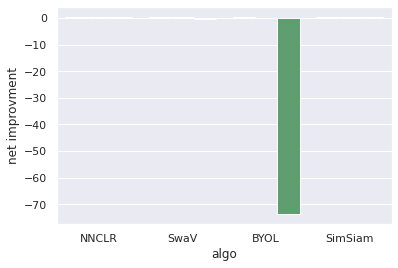

In [5]:
# relative comparison of imporvement with boxplots
sns.set_theme()
merged_results = pd.read_csv("/home/noah/ESSL/PAPER/results/merged.csv")
display(merged_results.dtypes)
for (ds, bs), df_i in df.groupby(['dataset', 'BS']):
    print(ds, bs)
    ds_bs_merged = merged_results[merged_results['data set'] == ds][merged_results['batch size'] == int(bs)]
    
    baseline = {row['algo'].lower():row['test acc (so)'] for _, row in ds_bs_merged.iterrows()}
    df_i['net improvment'] = [row['test_acc'] - baseline[row['algo'].lower()] for _, row in df_i.iterrows()]
    sns.barplot(data=df_i, x='algo', y='net improvment', hue='SSL_epochs',
                 hue_order=["50", "100", "1000"]
               ).legend().set_visible(False)
    plt.show()

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


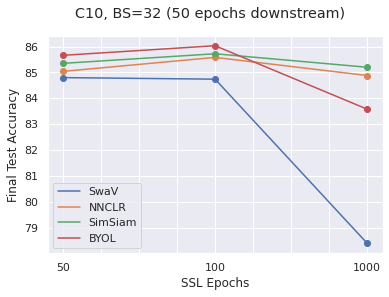

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


<Figure size 432x288 with 0 Axes>

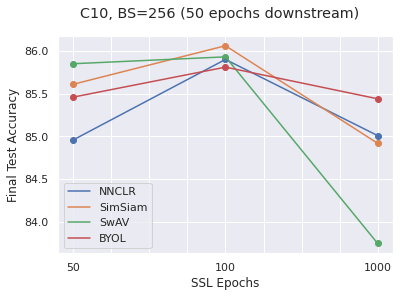

<Figure size 432x288 with 0 Axes>

In [6]:
convert = {
    "50":0, "100":1, "1000":2
}
df_c10 = df[df["dataset"] == "cifar10"]
df_c10 = df_c10[df_c10["BS"] == "32"]
fig, ax = plt.subplots(1)
for algo in df_c10["algo"].unique():
    df_algo = df_c10[df_c10["algo"] == algo]
    df_algo["SSL_epochs"] = df_algo["SSL_epochs"].apply(lambda x: convert[x])
    df_algo = df_algo.sort_values(by="SSL_epochs")
    ax.scatter(df_algo["SSL_epochs"], df_algo["test_acc"], label=None)
    ax.plot(df_algo["SSL_epochs"], df_algo["test_acc"], label = algo)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '50'
labels[5] = '100'
labels[-2] = '1000'
ax.set_xticklabels(labels)
plt.ylabel("Final Test Accuracy")
plt.xlabel("SSL Epochs")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "C10_32_50_epochs_downstream.png"))
plt.suptitle("C10, BS=32 (50 epochs downstream)")
plt.show()
plt.clf()    

df_c10 = df[df["dataset"] == "cifar10"]
df_c10 = df_c10[df_c10["BS"] == "256"]

fig, ax = plt.subplots(1)
for algo in df_c10["algo"].unique():
    df_algo = df_c10[df_c10["algo"] == algo]
    df_algo["SSL_epochs"] = df_algo["SSL_epochs"].apply(lambda x: convert[x])
    df_algo = df_algo.sort_values(by="SSL_epochs")
    ax.scatter(df_algo["SSL_epochs"], df_algo["test_acc"], label=None)
    ax.plot(df_algo["SSL_epochs"], df_algo["test_acc"], label = algo)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '50'
labels[5] = '100'
labels[-2] = '1000'
ax.set_xticklabels(labels)
plt.ylabel("Final Test Accuracy")
plt.xlabel("SSL Epochs")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "C10_256_50_epochs_downstream.png"))
plt.suptitle("C10, BS=256 (50 epochs downstream)")
plt.show()
plt.clf()    

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


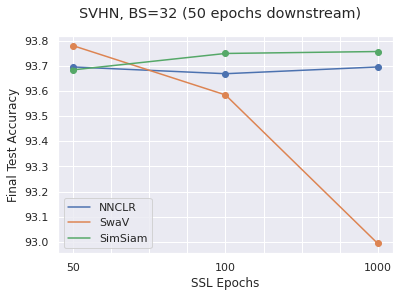

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


<Figure size 432x288 with 0 Axes>

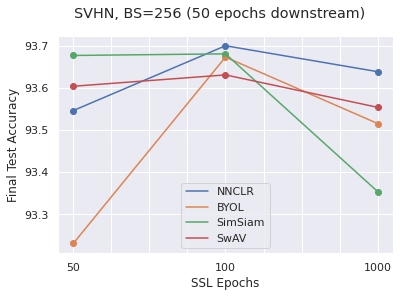

<Figure size 432x288 with 0 Axes>

In [7]:
convert = {
    "50":0, "100":1, "1000":2
}
df_c10 = df[df["dataset"] == "svhn"]
df_c10 = df_c10[df_c10["BS"] == "32"]
fig, ax = plt.subplots(1)
for algo in df_c10["algo"].unique():
    df_algo = df_c10[df_c10["algo"] == algo]
    df_algo["SSL_epochs"] = df_algo["SSL_epochs"].apply(lambda x: convert[x])
    df_algo = df_algo.sort_values(by="SSL_epochs")
    if algo == "BYOL":
        continue
    ax.scatter(df_algo["SSL_epochs"], df_algo["test_acc"], label=None)
    ax.plot(df_algo["SSL_epochs"], df_algo["test_acc"], label = algo)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '50'
labels[5] = '100'
labels[-2] = '1000'
ax.set_xticklabels(labels)
plt.ylabel("Final Test Accuracy")
plt.xlabel("SSL Epochs")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "SVHN_32_50_epochs_downstream.png"))
plt.suptitle("SVHN, BS=32 (50 epochs downstream)")
plt.show()
plt.clf()    

df_c10 = df[df["dataset"] == "svhn"]
df_c10 = df_c10[df_c10["BS"] == "256"]
fig, ax = plt.subplots(1)
for algo in df_c10["algo"].unique():
    df_algo = df_c10[df_c10["algo"] == algo]
    df_algo["SSL_epochs"] = df_algo["SSL_epochs"].apply(lambda x: convert[x])
    df_algo = df_algo.sort_values(by="SSL_epochs")
    ax.scatter(df_algo["SSL_epochs"], df_algo["test_acc"], label=None)
    ax.plot(df_algo["SSL_epochs"], df_algo["test_acc"], label = algo)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '50'
labels[5] = '100'
labels[-2] = '1000'
ax.set_xticklabels(labels)
plt.ylabel("Final Test Accuracy")
plt.xlabel("SSL Epochs")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "SVHN_256_50_epochs_downstream.png"))
plt.suptitle("SVHN, BS=256 (50 epochs downstream)")
plt.show()
plt.clf()   

In [8]:
df

,dataset,BS,algo,SSL_epochs,test_acc,test_loss
0,cifar10,32,SwaV,50,84.800003,0.445367
1,cifar10,32,SwaV,1000,78.400002,0.620051
2,cifar10,32,SwaV,100,84.739998,0.451477
3,svhn,256,NNCLR,1000,93.638596,0.222730
4,svhn,256,NNCLR,100,93.700058,0.222969
5,svhn,256,NNCLR,50,93.546402,0.232902
6,cifar10,32,NNCLR,50,85.040001,0.445859
7,cifar10,32,NNCLR,1000,84.879997,0.455933
8,cifar10,32,NNCLR,100,85.580002,0.429983
9,svhn,256,BYOL,1000,93.515671,0.234365


In [9]:
df.groupby(["BS", "algo", "dataset"])['test_acc'].max().round(2)

BS   algo     dataset
256  BYOL     cifar10    85.809998
              svhn       93.669998
     NNCLR    cifar10    85.900002
              svhn       93.699997
     SimSiam  cifar10    86.059998
              svhn       93.680000
     SwAV     cifar10    85.930000
              svhn       93.629997
32   BYOL     cifar10    86.029999
              svhn       93.870003
     NNCLR    cifar10    85.580002
              svhn       93.699997
     SimSiam  cifar10    85.720001
              svhn       93.760002
     SwaV     cifar10    84.800003
              svhn       93.779999
Name: test_acc, dtype: float32

In [10]:
b32_df = df[df["BS"]=="32"]
b32_df[b32_df["dataset"] == "Cifar10"].groupby("algo")['test_loss'].max()


Series([], Name: test_loss, dtype: float32)

Unnamed: 0          int64
exp                object
algo               object
test acc (so)     float64
test loss (so)    float64
test acc (mo)     float64
test loss (mo)    float64
batch size          int64
data set           object
dtype: object

cifar10 256


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


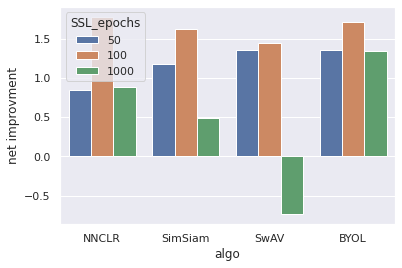

cifar10 32


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


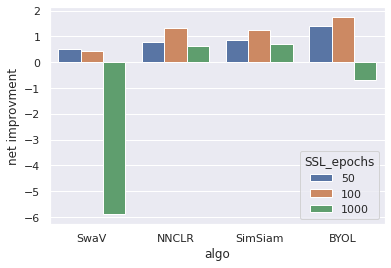

svhn 256


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


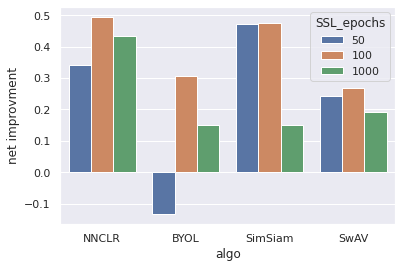

svhn 32


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


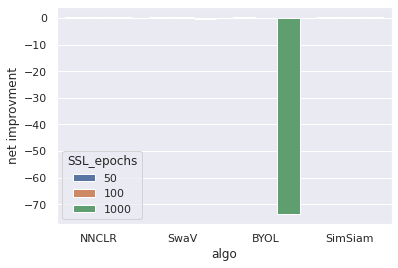

INSTEAD OF ALL EPOCHS, BEST EPOCH

In [12]:
exps = []
b32 = glob.glob("/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/*")
for b in b32:
    try:
        dset, bs, algo = os.path.basename(b).split("_")
    except:
        continue
    exps.append([b, dset, bs, algo])
#exps
for e in exps:
    print(e)
convert = {"990_50": "1000", "90_50":"100", "40_50":"50"}
results = []
for e, data, bsize, algo in exps:
    for f in glob.glob(os.path.join(e, "*_50/outcomes.json")):
        try:
            ssl_bs = convert[f.split("/")[-2]]
        except KeyError: 
            ssl_bs = f.split("/")[-2]
        with open(f, "r") as fp:
            outcomes = json.load(fp)
        best_acc_i = np.argmax(outcomes['test acc'][:10])# up to the 10th epoch
        test_acc = outcomes['test acc'][best_acc_i]
        test_loss = outcomes['final test loss'][best_acc_i]
        results.append([data, bsize, algo, ssl_bs, test_acc, test_loss])
df = pd.DataFrame(results, columns = ["dataset", "BS", "algo", "SSL_epochs", "test_acc", "test_loss"])
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column] = df[column].astype('int32')
    if df[column].dtype == "float64":
        df[column] = df[column].astype('float32')
df['dataset'] = df['dataset'].apply(lambda x: x.lower())
df['SSL_epochs'] = df['SSL_epochs'].apply(lambda x: x.split("_")[0])


['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_32_SwaV', 'Cifar10', '32', 'SwaV']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/SVHN_256_NNCLR', 'SVHN', '256', 'NNCLR']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_32_NNCLR', 'Cifar10', '32', 'NNCLR']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/SVHN_256_BYOL', 'SVHN', '256', 'BYOL']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_256_NNCLR', 'Cifar10', '256', 'NNCLR']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/SVHN_32_NNCLR', 'SVHN', '32', 'NNCLR']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/SVHN_32_SwaV', 'SVHN', '32', 'SwaV']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_32_SimSiam', 'Cifar10', '32', 'SimSiam']
['/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/Cifar10_256_SimSiam', 'Cifar10', '256',

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


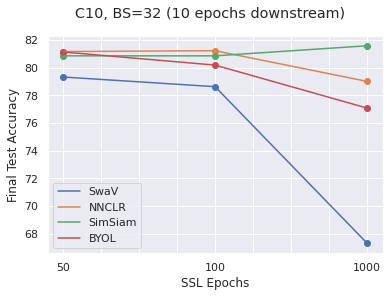

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


<Figure size 432x288 with 0 Axes>

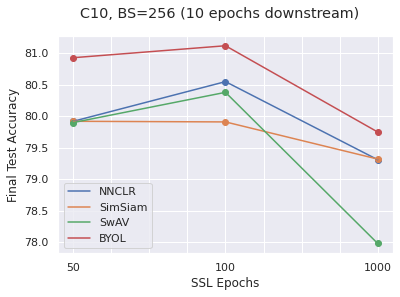

<Figure size 432x288 with 0 Axes>

In [13]:
convert = {
    "50":0, "100":1, "1000":2
}
df_c10 = df[df["dataset"] == "cifar10"]
df_c10 = df_c10[df_c10["BS"] == "32"]
fig, ax = plt.subplots(1)
for algo in df_c10["algo"].unique():
    df_algo = df_c10[df_c10["algo"] == algo]
    df_algo["SSL_epochs"] = df_algo["SSL_epochs"].apply(lambda x: convert[x])
    df_algo = df_algo.sort_values(by="SSL_epochs")
    ax.scatter(df_algo["SSL_epochs"], df_algo["test_acc"], label=None)
    ax.plot(df_algo["SSL_epochs"], df_algo["test_acc"], label = algo)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '50'
labels[5] = '100'
labels[-2] = '1000'
ax.set_xticklabels(labels)
plt.ylabel("Final Test Accuracy")
plt.xlabel("SSL Epochs")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "C10_32_10_epochs_downstream.png"))
plt.suptitle("C10, BS=32 (10 epochs downstream)")
plt.show()
plt.clf()    

df_c10 = df[df["dataset"] == "cifar10"]
df_c10 = df_c10[df_c10["BS"] == "256"]

fig, ax = plt.subplots(1)
for algo in df_c10["algo"].unique():
    df_algo = df_c10[df_c10["algo"] == algo]
    df_algo["SSL_epochs"] = df_algo["SSL_epochs"].apply(lambda x: convert[x])
    df_algo = df_algo.sort_values(by="SSL_epochs")
    ax.scatter(df_algo["SSL_epochs"], df_algo["test_acc"], label=None)
    ax.plot(df_algo["SSL_epochs"], df_algo["test_acc"], label = algo)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '50'
labels[5] = '100'
labels[-2] = '1000'
ax.set_xticklabels(labels)
plt.ylabel("Final Test Accuracy")
plt.xlabel("SSL Epochs")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "C10_256_10_epochs_downstream.png"))
plt.suptitle("C10, BS=256 (10 epochs downstream)")
plt.show()
plt.clf()    

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


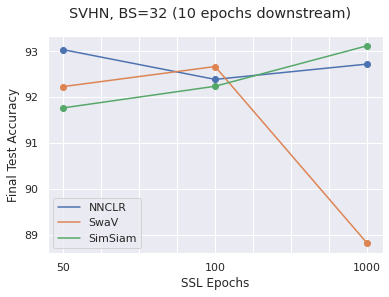

/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator


<Figure size 432x288 with 0 Axes>

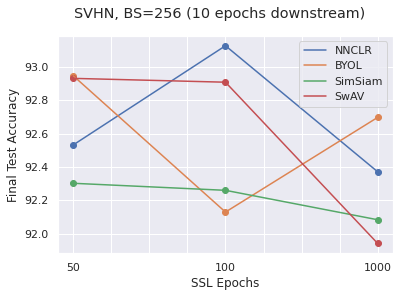

<Figure size 432x288 with 0 Axes>

In [14]:
convert = {
    "50":0, "100":1, "1000":2
}
df_c10 = df[df["dataset"] == "svhn"]
df_c10 = df_c10[df_c10["BS"] == "32"]
fig, ax = plt.subplots(1)
for algo in df_c10["algo"].unique():
    df_algo = df_c10[df_c10["algo"] == algo]
    df_algo["SSL_epochs"] = df_algo["SSL_epochs"].apply(lambda x: convert[x])
    df_algo = df_algo.sort_values(by="SSL_epochs")
    if algo == "BYOL":
        continue
    ax.scatter(df_algo["SSL_epochs"], df_algo["test_acc"], label=None)
    ax.plot(df_algo["SSL_epochs"], df_algo["test_acc"], label = algo)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '50'
labels[5] = '100'
labels[-2] = '1000'
ax.set_xticklabels(labels)
plt.ylabel("Final Test Accuracy")
plt.xlabel("SSL Epochs")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "SVHN_32_10_epochs_downstream.png"))
plt.suptitle("SVHN, BS=32 (10 epochs downstream)")
plt.show()
plt.clf()    

df_c10 = df[df["dataset"] == "svhn"]
df_c10 = df_c10[df_c10["BS"] == "256"]
fig, ax = plt.subplots(1)
for algo in df_c10["algo"].unique():
    df_algo = df_c10[df_c10["algo"] == algo]
    df_algo["SSL_epochs"] = df_algo["SSL_epochs"].apply(lambda x: convert[x])
    df_algo = df_algo.sort_values(by="SSL_epochs")
    ax.scatter(df_algo["SSL_epochs"], df_algo["test_acc"], label=None)
    ax.plot(df_algo["SSL_epochs"], df_algo["test_acc"], label = algo)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '50'
labels[5] = '100'
labels[-2] = '1000'
ax.set_xticklabels(labels)
plt.ylabel("Final Test Accuracy")
plt.xlabel("SSL Epochs")
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "SVHN_256_10_epochs_downstream.png"))
plt.suptitle("SVHN, BS=256 (10 epochs downstream)")
plt.show()
plt.clf()   

# barplot for improvement for 10 epochs (bad)

Unnamed: 0          int64
exp                object
algo               object
test acc (so)     float64
test loss (so)    float64
test acc (mo)     float64
test loss (mo)    float64
batch size          int64
data set           object
dtype: object

cifar10 256


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


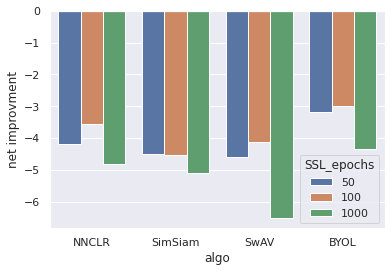

cifar10 32


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


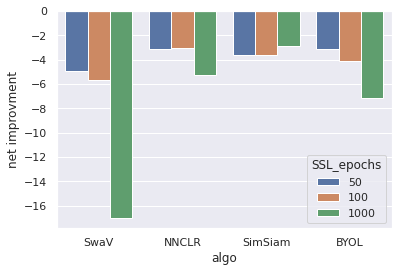

svhn 256


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


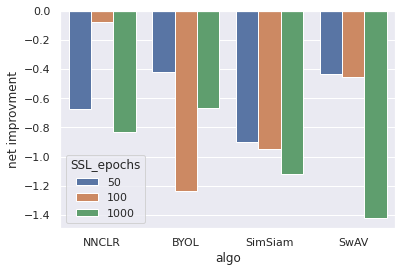

svhn 32


/home/noah/.conda/envs/essl/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


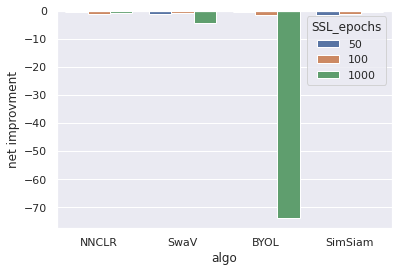

In [15]:
# relative comparison of imporvement with boxplots
sns.set_theme()
merged_results = pd.read_csv("/home/noah/ESSL/PAPER/results/merged.csv")
display(merged_results.dtypes)
for (ds, bs), df_i in df.groupby(['dataset', 'BS']):
    print(ds, bs)
    ds_bs_merged = merged_results[merged_results['data set'] == ds][merged_results['batch size'] == int(bs)]
    
    baseline = {row['algo'].lower():row['test acc (so)'] for _, row in ds_bs_merged.iterrows()}
    df_i['net improvment'] = [row['test_acc'] - baseline[row['algo'].lower()] for _, row in df_i.iterrows()]
    sns.barplot(data=df_i, x='algo', y='net improvment', hue='SSL_epochs',
                 hue_order=["50", "100", "1000"]
               )
    plt.show()

# min max scaling

In [23]:
exps = []

# b256 = glob.glob("/home/noah/ESSL/final_exps/optimization/exp8*/*")
# for b in b256:
#     exps.append([b, "cifar10", 256, get_algorithm(os.path.join(b, "params.txt"))])

# b256_svhn = glob.glob("/home/noah/ESSL/final_exps/optimization/exp10*/*")
# for b in b256_svhn:
#     exps.append([b, "svhn", 256, get_algorithm(os.path.join(b, "params.txt"))])

b32 = glob.glob("/home/noah/ESSL/exps/Analysis/train_models_longer/best_overall_acc/*")
for b in b32:
    try:
        dset, bs, algo = os.path.basename(b).split("_")
    except:
        continue
    exps.append([b, dset, bs, algo])

convert = {"990_50": "1000", "90_50":"100", "40_50":"50"}
results = []
for e, data, bsize, algo in exps:
    for f in glob.glob(os.path.join(e, "*_50/outcomes.json")):
        try:
            ssl_bs = convert[f.split("/")[-2]]
        except KeyError: 
            ssl_bs = f.split("/")[-2]
        with open(f, "r") as fp:
            outcomes = json.load(fp)
        best_acc_i = np.argmax(outcomes['test acc'])
        test_acc = outcomes['test acc'][best_acc_i]
        test_loss = outcomes['final test loss'][best_acc_i]
        results.append([data, bsize, algo, ssl_bs, test_acc, test_loss])
df = pd.DataFrame(results, columns = ["dataset", "BS", "algo", "SSL_epochs", "test_acc", "test_loss"])
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column] = df[column].astype('int32')
    if df[column].dtype == "float64":
        df[column] = df[column].astype('float32')
df['dataset'] = df['dataset'].apply(lambda x: x.lower())
df['SSL_epochs'] = df['SSL_epochs'].apply(lambda x: x.split("_")[0])
df.to_csv("/home/noah/ESSL/final_exps/final_results/train_models_longer.csv")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_acc = df['test_acc'].to_numpy().reshape(-1, 1)

df['test_acc'] = scaler.fit_transform(test_acc).squeeze()
df

,dataset,BS,algo,SSL_epochs,test_acc,test_loss
0,cifar10,32,SwaV,50,0.877909,0.445367
1,cifar10,32,SwaV,1000,0.791751,0.620051
2,cifar10,32,SwaV,100,0.877102,0.451477
3,svhn,256,NNCLR,1000,0.996897,0.222730
4,svhn,256,NNCLR,100,0.997724,0.222969
5,svhn,256,NNCLR,50,0.995656,0.232902
6,cifar10,32,NNCLR,50,0.881140,0.445859
7,cifar10,32,NNCLR,1000,0.878986,0.455933
8,cifar10,32,NNCLR,100,0.888410,0.429983
9,svhn,256,BYOL,1000,0.995242,0.234365


cifar10 256


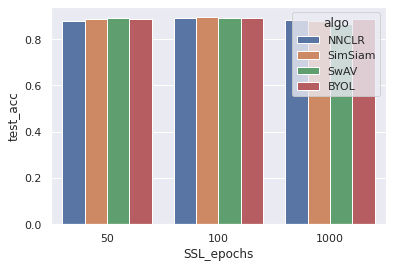

cifar10 32


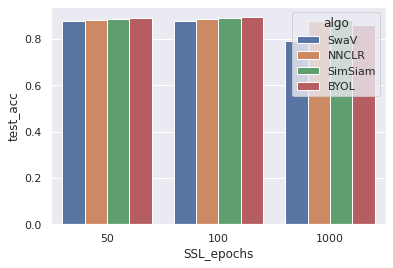

svhn 256


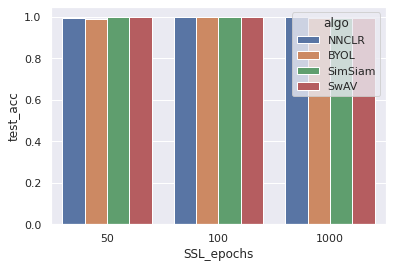

svhn 32


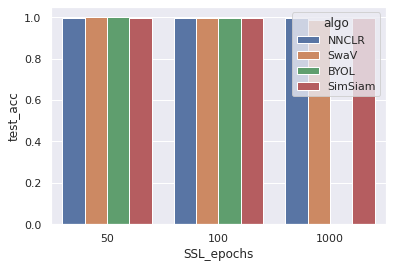

In [24]:
# comparison with boxplots
sns.set_theme()
for (ds, bs), df_i in df.groupby(['dataset', 'BS']):
    print(ds, bs)

    sns.barplot(data=df_i, x='SSL_epochs', y='test_acc', hue='algo', order=["50", "100", "1000"])
    plt.show()